In [124]:
#import libraries 
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [125]:
#read data into a dataframe
data = pd.read_csv('MildModerateSevereData_Final.csv')
#looking at the first five rows of the dataset
data.head()
#we see that there are patients given by patient id, the final category putting them in mild, moderate and severe categories
#the feature variables: fatigue, weakness, depression, anxiety, dry skin, spasms, tingling, headaches, cramps are 
#all categorical and the last feature variable number of symptoms is a simple sum of these categorical variables 

,Patient,Final Category,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps,Number of Symptoms
0,1,Mild,0,0,1,0,0,0,0,0,0,1
1,2,Mild,0,0,0,0,0,0,1,1,0,2
2,3,Mild,1,0,0,0,1,0,1,1,0,4
3,4,Mild,0,0,0,0,0,0,0,0,0,0
4,5,Mild,0,0,0,0,0,0,1,0,0,1


In [126]:
#now that we have looked at the features, let's see if there are any missing values
data.isnull().sum()
#we see that there are no missing values - so, we are good to go from that perspective - let's
#look at the feature space

Patient               0
Final Category        0
Fatigue               0
Weakness              0
Depression            0
Anxiety               0
Dry Skin              0
Spasms                0
Tingling              0
Headaches             0
Cramps                0
Number of Symptoms    0
dtype: int64

<AxesSubplot:>

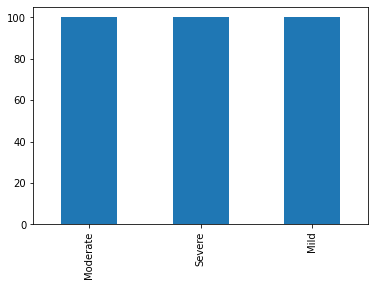

In [173]:
#Plot1: Seeing the number of cases for mild, moderate and severe
data['Final Category'].value_counts().plot(kind='bar')
#We see that the dataset is balanced such that there are 100 observations for each value of the
#the target variable ie., mild, moderate and severe

<AxesSubplot:xlabel='Final Category,Fatigue'>

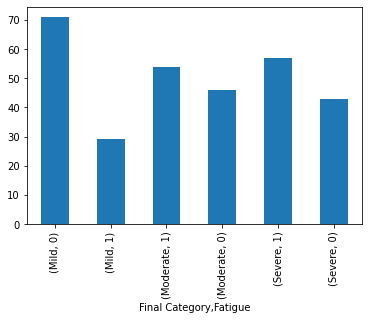

In [175]:
#Plot2: Seeing the number of cases grouped by target variable corresponding to Fatigue
data.groupby('Final Category')['Fatigue'].value_counts().plot(kind='bar')
#we see that patients classified as mild, mostly are not fatigued while the opposite is true
#for moderate and severe classified patients

In [177]:
#Plot3: Seeing the number of cases grouped by target variable corresponding to Weakness
#WE EXPECT TO SEE SIMILAR BEHAVIOR FOR WEAKNESS, UNCOMMENT TO VIEW THE RESULTS
#data.groupby('Final Category')['Weakness'].value_counts().plot(kind='bar')
#we see that patients classified as mild, mostly are not Wwek while the opposite is true
#for moderate and severe classified patients

<AxesSubplot:xlabel='Final Category,Depression '>

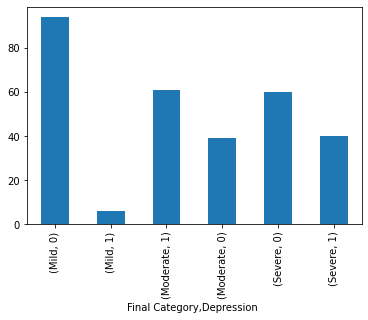

In [179]:
#Plot4: Seeing the number of cases grouped by target variable corresponding to Fatigue
data.groupby('Final Category')['Depression '].value_counts().plot(kind='bar')
#we see that patients classified as mild, are not depressed at all (only by a small proportion)
#while the opposite is true for moderate and severe classified patients

In [181]:
#Plot5: Seeing the number of cases grouped by target variable corresponding to Fatigue
#WE EXPECT TO SEE SIMILAR BEHAVIOR FOR WEAKNESS, UNCOMMENT TO VIEW THE RESULTS
#data.groupby('Final Category')['Anxiety'].value_counts().plot(kind='bar')
#we see that patients classified as mild, are not anxious at all (only by a small proportion)
#while the opposite is true for moderate and severe classified patients

<AxesSubplot:xlabel='Final Category,Dry Skin'>

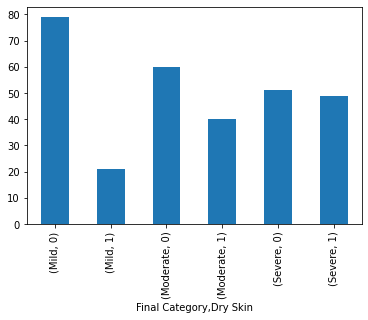

In [182]:
#Plot6: Seeing the number of cases grouped by target variable corresponding to Fatigue
data.groupby('Final Category')['Dry Skin'].value_counts().plot(kind='bar')
#we see that patients classified as mild, mostly do not have dry skin while the same cannot be 
#said for moderate and severe classified patients with as much certainity

<AxesSubplot:xlabel='Final Category,Spasms'>

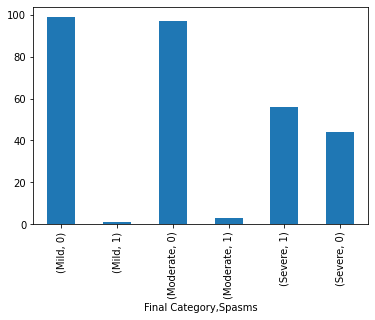

In [183]:
#Plot7: Seeing the number of cases grouped by target variable corresponding to Fatigue
data.groupby('Final Category')['Spasms'].value_counts().plot(kind='bar')
#we see that patients classified as mild and moderate, mostly do not experience spasms while 
#the same cannot be said for severe classified patients with as much certainity

<AxesSubplot:xlabel='Final Category,Tingling'>

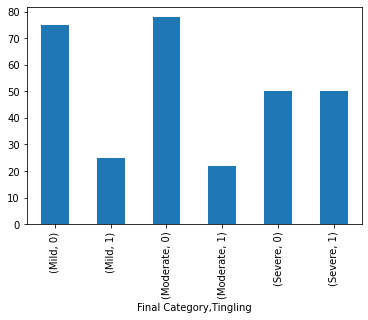

In [184]:
#Plot8: Seeing the number of cases grouped by target variable corresponding to Fatigue
#WE EXPECT TO SEE SIMILAR BEHAVIOR FOR WEAKNESS, UNCOMMENT TO VIEW THE RESULTS
#data.groupby('Final Category')['Tingling'].value_counts().plot(kind='bar')
#we see that patients classified as mild and moderate, mostly do not experience tingling while 
#the same cannot be said for severe classified patients with as much certainity

<AxesSubplot:xlabel='Final Category,Headaches'>

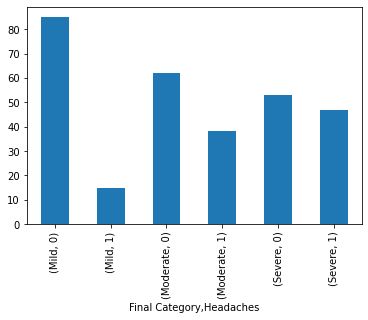

In [188]:
#Plot9: Seeing the number of cases grouped by target variable corresponding to Fatigue
data.groupby('Final Category')['Headaches'].value_counts().plot(kind='bar')
#we see that patients classified as mild, mostly do not have headaches while the same cannot be 
#said for moderate and severe classified patients with as much certainity

In [186]:
#Plot10: Seeing the number of cases grouped by target variable corresponding to Fatigue
#WE EXPECT TO SEE SIMILAR BEHAVIOR FOR WEAKNESS, UNCOMMENT TO VIEW THE RESULTS
#data.groupby('Final Category')['Cramps'].value_counts().plot(kind='bar')
#we see that patients classified as mild and moderate, mostly do not experience cramps while 
#the same cannot be said for severe classified patients with as much certainity

In [189]:
#feature space
X = data.iloc[:,2:]
y = data['Final Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [190]:
#Model1: Decision Tree Classifier (using general default parameters)
#this is the default model that we build so that we can evaluate the condition for overfitting
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Train Accuracy: ",accuracy_score(y_train,y_pred_train)*100)
print("Test Accuracy: ",accuracy_score(y_test,y_pred)*100)
#Indeed, the model is overfitting as we see that the train accuracy is very high in comparison
#to the test accuracy. We are and will be primarily looking at accuracy of these models because
#our dataset is balanced ie., we have 100 observations for each level of the target variable

Confusion Matrix:
 [[26  6  1]
 [ 5 26  2]
 [ 0  7 26]]
Train Accuracy:  97.51243781094527
Test Accuracy:  78.78787878787878


In [191]:
#Model 2: Decision Tree Classifier (finding the parameters for overfitting)
decision_tree = DecisionTreeClassifier(random_state=1234)
param_dict = {
    "max_depth": range(1,10)
}
grid = GridSearchCV(decision_tree, param_grid = param_dict,cv=10)
grid.fit(X_train,y_train)
print("Best parameters",grid.best_params_)
#We find that the max depth is 5, so this might be the overfitting parameter

Best parameters {'max_depth': 5}


In [192]:
#Model 3: Decision Tree Classifier (running the average fit model)
#For the average fit model, we reduce the max_depth parameter from 5 to 3 to see its effect
#on training and test accuracies
clf = DecisionTreeClassifier(random_state=1234, max_depth=3)
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Train Accuracy: ",accuracy_score(y_train,y_pred_train)*100)
print("Test Accuracy: ",accuracy_score(y_test,y_pred)*100)
#Both the training and test accuracies are fairly in the same range, hence we can say that 
#we have escaped the overfitting condition

Confusion Matrix:
 [[25  7  1]
 [ 0 27  6]
 [ 0  3 30]]
Train Accuracy:  87.06467661691542
Test Accuracy:  82.82828282828282


In [193]:
#Model 4: Random Forest Classifier (comparing this model with DT model)
#this is because we check if our decision tree model built is good enough by comparing the 
#accuracy of random forest model with the decision tree model
model = RandomForestClassifier(random_state=1234)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
#well, yes the dt model is fair enough given that the accuracies lie in the same range

Accuracy: 78.78787878787878


In [194]:
#Let's take a look at the rules now from our decision tree classifier
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_9 <= 2.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: Mild
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: Severe
|   |--- feature_2 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: Moderate
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: Severe
|--- feature_9 >  2.50
|   |--- feature_9 <= 3.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: Moderate
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: Severe
|   |--- feature_9 >  3.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: Severe
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: Severe



In [ ]:
#Rules
#1. Number of symptoms <= 2, no depression and no cramps --> Mild 
#2. Number of symptoms <= 2, no depression and cramps --> Severe
#3. Number of symptoms <= 2, has depression and no spasms --> Moderate
#4. Number of symptoms <= 2, has depression and spasms --> Severe
#5. Number of symptoms between 2 and 3, and no cramps --> Moderate
#6. Number of symptoms between 2 and 3, and no cramps --> Severe
#7. Number of symptoms more than 3, and no spasms --> Severe
#8. Number of symptoms more than 3, and has spasms --> Severe

In [ ]:
#Simplifying these rules further:
#For Mild, 
    #Rule: At most 2 symptoms and no depression or cramps
#For Moderate
    #Rule1: At most 2 symptoms, has depression but no spasms 
    #Rule2: Number of symptoms between 2 and 3, but no cramps 
#For Severe
    #Rule1: At most 2 symptoms, has cramps but not depression
    #Rule2: At most 2 symptoms, has cramps and depression
    #Rule3: Number of symptoms between 2 and 3 but not cramps
    #Rule4: Number of symptoms more than 3 and may or may not have spasms